# 1. Problem

Given periodic time , can we forecast the revenue, sales quantity, average cost and the average annual payroll of the region for the next 32 months?

# 2. Data

Data is from 1/1/2015 until 1/4/2020

Data is acquired from kaggle: https://www.kaggle.com/datasets/podsyp/time-series-starter-dataset

# 3. Features

1. Revenue: Company revenue

2. Sales_quantity: Company Sales

3. Average_cost: Average cost of production

4. The_average_annual_payroll_of_the_region: The average number of employees in the region per year

### Data Preparation

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Month_Value_1.csv',parse_dates=['Period'])

Seperating the data from  1.5.2022 until the end as it will be used for forecasting

In [3]:
forecast_df = df.loc[64:]
forecast_df

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
64,2020-01-05,NaN,NaN,NaN,NaN
65,2020-01-06,NaN,NaN,NaN,NaN
66,2020-01-07,NaN,NaN,NaN,NaN
67,2020-01-08,NaN,NaN,NaN,NaN
68,2020-01-09,NaN,NaN,NaN,NaN
69,2020-01-10,NaN,NaN,NaN,NaN
70,2020-01-11,NaN,NaN,NaN,NaN
71,2020-01-12,NaN,NaN,NaN,NaN
72,2021-01-01,NaN,NaN,NaN,NaN
73,2021-01-02,NaN,NaN,NaN,NaN


In [4]:
df = df.drop(df.index[64:])
df

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
1,2015-01-02,1.580759e+07,11636.0,1358.507000,30024676.0
2,2015-01-03,2.204715e+07,15922.0,1384.697024,30024676.0
3,2015-01-04,1.881458e+07,15227.0,1235.606705,30024676.0
4,2015-01-05,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
59,2019-01-12,5.875647e+07,38069.0,1543.420464,29878525.0
60,2020-01-01,5.628830e+07,27184.0,2070.640850,29044998.0
61,2020-01-02,4.022524e+07,23509.0,1711.057181,29044998.0
62,2020-01-03,5.002217e+07,32569.0,1535.882748,29044998.0


In [5]:
df.dtypes

Period                                      datetime64[ns]
Revenue                                            float64
Sales_quantity                                     float64
Average_cost                                       float64
The_average_annual_payroll_of_the_region           float64
dtype: object

Making `Period` column as index

In [6]:
df = df.set_index('Period')
df

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-01-02,1.580759e+07,11636.0,1358.507000,30024676.0
2015-01-03,2.204715e+07,15922.0,1384.697024,30024676.0
2015-01-04,1.881458e+07,15227.0,1235.606705,30024676.0
2015-01-05,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...
2019-01-12,5.875647e+07,38069.0,1543.420464,29878525.0
2020-01-01,5.628830e+07,27184.0,2070.640850,29044998.0
2020-01-02,4.022524e+07,23509.0,1711.057181,29044998.0


### Plotting individuals columns against time

<AxesSubplot:xlabel='Period'>

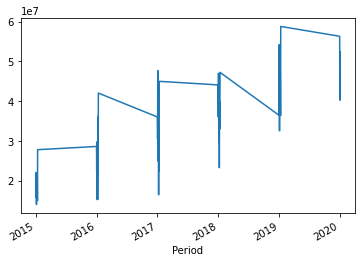

In [7]:
df['Revenue'].plot()

<AxesSubplot:xlabel='Period'>

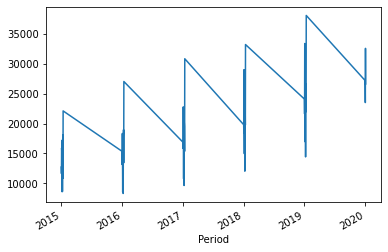

In [8]:
df['Sales_quantity'].plot()

<AxesSubplot:xlabel='Period'>

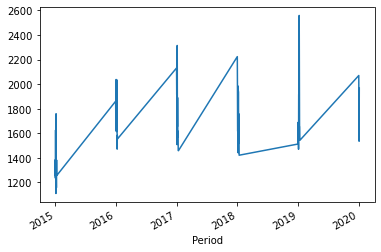

In [9]:
df['Average_cost'].plot()

<AxesSubplot:xlabel='Period'>

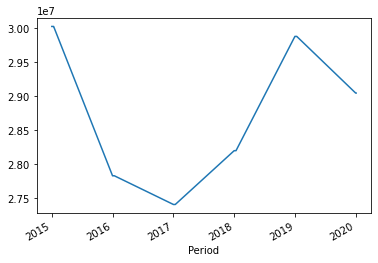

In [10]:
df['The_average_annual_payroll_of_the_region'].plot()

## Split train and test

In [11]:
test_point = np.round(0.9*len(df))
test_point

58.0

In [12]:
len(df)

64

In [13]:
test_idx = int(len(df) - test_point)
test_idx

6

In [14]:
train = df[:-test_idx]
test = df[-test_idx:]

In [15]:
train

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-01-02,1.580759e+07,11636.0,1358.507000,30024676.0
2015-01-03,2.204715e+07,15922.0,1384.697024,30024676.0
2015-01-04,1.881458e+07,15227.0,1235.606705,30024676.0
2015-01-05,1.402148e+07,8620.0,1626.621765,30024676.0
2015-01-06,1.678393e+07,13160.0,1275.374508,30024676.0
2015-01-07,1.916189e+07,17254.0,1110.576805,30024676.0
2015-01-08,1.520498e+07,8642.0,1759.428870,30024676.0
2015-01-09,2.060394e+07,16144.0,1276.259909,30024676.0


In [16]:
test

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2019-01-11,3.637496e+07,21987.0,1654.384704,29878525.0
2019-01-12,5.875647e+07,38069.0,1543.420464,29878525.0
2020-01-01,5.628830e+07,27184.0,2070.640850,29044998.0
2020-01-02,4.022524e+07,23509.0,1711.057181,29044998.0
2020-01-03,5.002217e+07,32569.0,1535.882748,29044998.0
2020-01-04,5.232069e+07,26615.0,1965.834790,29044998.0


### Scale data


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

### Batch generator

In [18]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length = 4
n_features = scaled_train.shape[1]

train_generator = TimeseriesGenerator(scaled_train,
                                      scaled_train,
                                      length=length,
                                      batch_size=1)

test_generator = TimeseriesGenerator(scaled_test,
                                     scaled_test,
                                     length=length,
                                     batch_size=1)

In [19]:
scaled_train.shape[1]

4

In [20]:
X,y=train_generator[0]

In [21]:
X

array([[[0.04949551, 0.17614203, 0.10159558, 1.        ],
        [0.04445573, 0.13253541, 0.17113371, 1.        ],
        [0.1997566 , 0.30353082, 0.18921136, 1.        ],
        [0.11929902, 0.27580291, 0.08630183, 1.        ]]])

In [22]:
y

array([[0.        , 0.01220826, 0.35619981, 1.        ]])

# 4. Modelling

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

model = Sequential()
model.add(LSTM(100,activation='tanh',input_shape=(length,scaled_train.shape[1])))
model.add(Dense(8,activation='relu'))
model.add(Dense(scaled_train.shape[1]))

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer='adam',
              loss='mse')

early_stop = EarlyStopping(monitor='val_loss',patience=2)


model.fit_generator(train_generator,
                    epochs=1000,
                    validation_data=test_generator,
                    callbacks=[early_stop])

Epoch 1/1000


C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_12700\1033307906.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


54/54 [==============================] - 2s 11ms/step - loss: 0.1457 - val_loss: 0.1128
Epoch 2/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.0898 - val_loss: 0.0734
Epoch 3/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.0737 - val_loss: 0.0592
Epoch 4/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.0658 - val_loss: 0.0478
Epoch 5/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.0600 - val_loss: 0.0437
Epoch 6/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.0556 - val_loss: 0.0405
Epoch 7/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.0559 - val_loss: 0.0382
Epoch 8/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.0535 - val_loss: 0.0414
Epoch 9/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.0536 - val_loss: 0.0354
Epoch 10/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.0529 - val_loss: 0.0484
Epoch 11/10

In [25]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.145727,0.112837
1,0.089797,0.073406
2,0.073708,0.059241
3,0.065760,0.047845
4,0.059973,0.043677
5,0.055630,0.040546
6,0.055898,0.038214
7,0.053513,0.041406
8,0.053590,0.035431
9,0.052929,0.048412


# 5. Evaluation

<AxesSubplot:>

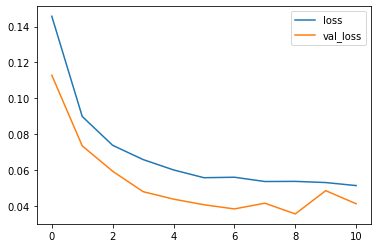

In [26]:
losses.plot()

In [27]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,scaled_train.shape[1]))


for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 18ms/step


In [28]:
true_predictions = scaler.inverse_transform(test_predictions)

In [29]:
true_predictions

array([[4.64123852e+07, 2.20166516e+04, 1.93239452e+03, 2.94129681e+07],
       [4.59685471e+07, 2.23625133e+04, 1.95343866e+03, 2.93505811e+07],
       [4.73955184e+07, 2.31316465e+04, 2.00138846e+03, 2.93922679e+07],
       [4.63729580e+07, 2.30946418e+04, 1.99862648e+03, 2.93189663e+07],
       [4.54656857e+07, 2.32267539e+04, 2.00631304e+03, 2.92399966e+07],
       [4.54168088e+07, 2.34309391e+04, 2.01883845e+03, 2.92190967e+07]])

In [30]:
scaler.inverse_transform(scaled_test)

array([[3.63749565e+07, 2.19870000e+04, 1.65438470e+03, 2.98785250e+07],
       [5.87564737e+07, 3.80690000e+04, 1.54342046e+03, 2.98785250e+07],
       [5.62883009e+07, 2.71840000e+04, 2.07064085e+03, 2.90449980e+07],
       [4.02252433e+07, 2.35090000e+04, 1.71105718e+03, 2.90449980e+07],
       [5.00221652e+07, 3.25690000e+04, 1.53588275e+03, 2.90449980e+07],
       [5.23206929e+07, 2.66150000e+04, 1.96583479e+03, 2.90449980e+07]])

Lets compare each column of test and true predictions

In [31]:
test.columns

Index(['Revenue', 'Sales_quantity', 'Average_cost',
       'The_average_annual_payroll_of_the_region'],
      dtype='object')

In [32]:
true_predictions_index = pd.date_range(start='2019-11-01', periods=6, freq='MS')
true_predictions_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01'],
              dtype='datetime64[ns]', freq='MS')

In [33]:
# Change the date format to 'yyyy-dd-mm'
formatted_index = true_predictions_index.strftime('%Y-%d-%m')

# Print the result
print(formatted_index)

Index(['2019-01-11', '2019-01-12', '2020-01-01', '2020-01-02', '2020-01-03',
       '2020-01-04'],
      dtype='object')


In [34]:
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns,
                                index=formatted_index)
true_predictions

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
2019-01-11,4.641239e+07,22016.651564,1932.394515,2.941297e+07
2019-01-12,4.596855e+07,22362.513334,1953.438660,2.935058e+07
2020-01-01,4.739552e+07,23131.646495,2001.388457,2.939227e+07
2020-01-02,4.637296e+07,23094.641846,1998.626479,2.931897e+07
2020-01-03,4.546569e+07,23226.753925,2006.313043,2.924000e+07
2020-01-04,4.541681e+07,23430.939090,2018.838446,2.921910e+07


In [35]:
test

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2019-01-11,3.637496e+07,21987.0,1654.384704,29878525.0
2019-01-12,5.875647e+07,38069.0,1543.420464,29878525.0
2020-01-01,5.628830e+07,27184.0,2070.640850,29044998.0
2020-01-02,4.022524e+07,23509.0,1711.057181,29044998.0
2020-01-03,5.002217e+07,32569.0,1535.882748,29044998.0
2020-01-04,5.232069e+07,26615.0,1965.834790,29044998.0


# Forecasting 

In [36]:
full_scaler = MinMaxScaler()

full_scaled = full_scaler.fit_transform(df)

In [37]:
full_generator = TimeseriesGenerator(full_scaled,
                                     full_scaled,
                                     length=32,
                                     batch_size=1)

In [38]:
model = Sequential()
model.add(LSTM(100,activation='tanh',input_shape=(length,scaled_train.shape[1])))
model.add(Dense(8,activation='relu'))
model.add(Dense(scaled_train.shape[1]))

In [39]:
model.compile(optimizer='adam',
              loss='mse')



model.fit_generator(full_generator,
                    epochs=11)

Epoch 1/11


C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_12700\3155672708.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(full_generator,


32/32 [==============================] - 2s 8ms/step - loss: 0.0910
Epoch 2/11
32/32 [==============================] - 0s 8ms/step - loss: 0.0514
Epoch 3/11
32/32 [==============================] - 0s 9ms/step - loss: 0.0437
Epoch 4/11
32/32 [==============================] - 0s 9ms/step - loss: 0.0405
Epoch 5/11
32/32 [==============================] - 0s 9ms/step - loss: 0.0412
Epoch 6/11
32/32 [==============================] - 0s 8ms/step - loss: 0.0395
Epoch 7/11
32/32 [==============================] - 0s 8ms/step - loss: 0.0373
Epoch 8/11
32/32 [==============================] - 0s 9ms/step - loss: 0.0403
Epoch 9/11
32/32 [==============================] - 0s 8ms/step - loss: 0.0407
Epoch 10/11
32/32 [==============================] - 0s 9ms/step - loss: 0.0377
Epoch 11/11
32/32 [==============================] - 0s 8ms/step - loss: 0.0365


In [40]:
forecast = []
n_features = scaled_train.shape[1]
first_eval_batch = full_scaled[-length:] 
current_batch = first_eval_batch.reshape((1,length,n_features))


for i in range(32):
    
    current_pred = model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 18ms/step


In [41]:
true_forecast = full_scaler.inverse_transform(forecast)
true_forecast

array([[2.92686115e+07, 2.08651667e+04, 1.69992339e+03, 2.87126175e+07],
       [2.87647314e+07, 1.97645678e+04, 1.64817961e+03, 2.86163406e+07],
       [2.85117994e+07, 1.90356835e+04, 1.61458252e+03, 2.85282491e+07],
       [2.77219251e+07, 1.80087377e+04, 1.56869689e+03, 2.84005857e+07],
       [2.62754438e+07, 1.68457094e+04, 1.52025989e+03, 2.82930032e+07],
       [2.57102642e+07, 1.63891453e+04, 1.49998519e+03, 2.82292756e+07],
       [2.51958244e+07, 1.59846771e+04, 1.48230978e+03, 2.81729542e+07],
       [2.47112184e+07, 1.56174146e+04, 1.46636301e+03, 2.81231215e+07],
       [2.43283181e+07, 1.53217448e+04, 1.45342139e+03, 2.80840425e+07],
       [2.40692080e+07, 1.51131273e+04, 1.44408750e+03, 2.80552316e+07],
       [2.38497589e+07, 1.49400217e+04, 1.43638639e+03, 2.80314262e+07],
       [2.36695206e+07, 1.47993532e+04, 1.43013582e+03, 2.80121681e+07],
       [2.35284120e+07, 1.46888650e+04, 1.42521456e+03, 2.79970430e+07],
       [2.34186391e+07, 1.46024473e+04, 1.42135571e

In [42]:
len(true_forecast)

32

In [43]:
forecast_df.set_index('Period',inplace=True)

In [44]:
forecast_df

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2020-01-05,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN
2020-01-09,NaN,NaN,NaN,NaN
2020-01-10,NaN,NaN,NaN,NaN
2020-01-11,NaN,NaN,NaN,NaN
2020-01-12,NaN,NaN,NaN,NaN
2021-01-01,NaN,NaN,NaN,NaN


In [45]:
forecast_df = pd.DataFrame(data=true_forecast,
                           index=forecast_df.index,
                           columns=df.columns)
forecast_df

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2020-01-05,2.926861e+07,20865.166748,1699.923385,2.871262e+07
2020-01-06,2.876473e+07,19764.567819,1648.179612,2.861634e+07
2020-01-07,2.851180e+07,19035.683456,1614.582519,2.852825e+07
2020-01-08,2.772193e+07,18008.737712,1568.696887,2.840059e+07
2020-01-09,2.627544e+07,16845.709422,1520.259889,2.829300e+07
2020-01-10,2.571026e+07,16389.145336,1499.985187,2.822928e+07
2020-01-11,2.519582e+07,15984.677103,1482.309775,2.817295e+07
2020-01-12,2.471122e+07,15617.414556,1466.363008,2.812312e+07
2021-01-01,2.432832e+07,15321.744788,1453.421387,2.808404e+07


In [46]:
forecast_df

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2020-01-05,2.926861e+07,20865.166748,1699.923385,2.871262e+07
2020-01-06,2.876473e+07,19764.567819,1648.179612,2.861634e+07
2020-01-07,2.851180e+07,19035.683456,1614.582519,2.852825e+07
2020-01-08,2.772193e+07,18008.737712,1568.696887,2.840059e+07
2020-01-09,2.627544e+07,16845.709422,1520.259889,2.829300e+07
2020-01-10,2.571026e+07,16389.145336,1499.985187,2.822928e+07
2020-01-11,2.519582e+07,15984.677103,1482.309775,2.817295e+07
2020-01-12,2.471122e+07,15617.414556,1466.363008,2.812312e+07
2021-01-01,2.432832e+07,15321.744788,1453.421387,2.808404e+07
